# Instagram Reach Analysis (Text Analysis and Word Cloud)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [2]:
data = pd.read_csv("Instagram.csv", encoding = 'latin1')


In [3]:
data.head(15)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...
5,3884,2046,1214,329,43,74,7,10,144,9,2,Here are some of the most important soft skill...,#data #datascience #dataanalysis #dataanalytic...
6,2621,1543,599,333,25,22,5,1,76,26,0,Learn how to analyze a candlestick chart as a ...,#stockmarket #investing #stocks #trading #mone...
7,3541,2071,628,500,60,135,4,9,124,12,6,Here are some of the best books that you can f...,#python #pythonprogramming #pythonprojects #py...
8,3749,2384,857,248,49,155,6,8,159,36,4,Here are some of the best data analysis projec...,#dataanalytics #datascience #data #machinelear...
9,4115,2609,1104,178,46,122,6,3,191,31,6,Here are two best ways to count the number of ...,#python #pythonprogramming #pythonprojects #py...


In [4]:
# Check for NAs
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [5]:
# remove NAs
data = data.dropna()

In [6]:
# displays info about each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


### Analyzing Distribution of values (using Histogram + Density plot) in each column

C:\Users\user\AppData\Local\Temp\ipykernel_10680\2704861224.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Home'])


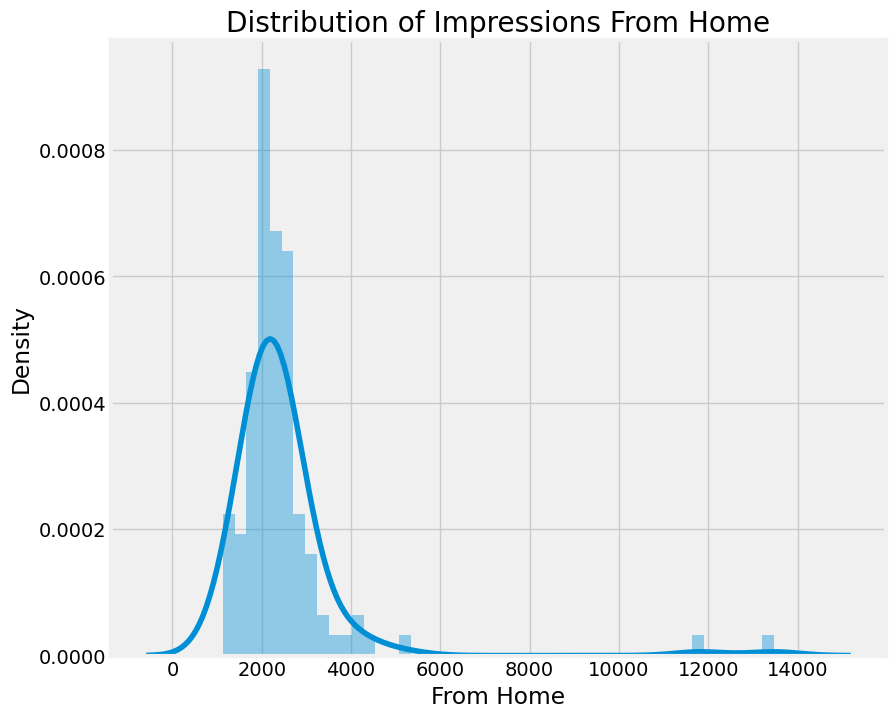

In [7]:
plt.figure(figsize=(10, 8))

plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])   # distplot will soon be deprecated. use displot or histplot
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10680\620881339.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Hashtags'])


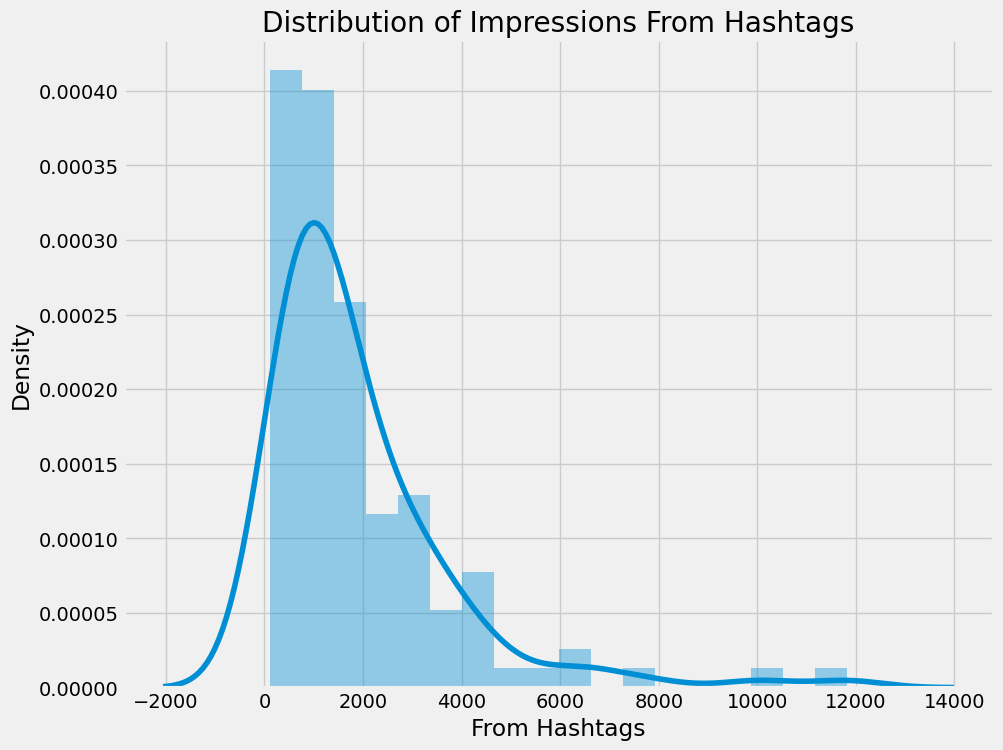

In [8]:
plt.figure(figsize=(10, 8))

plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10680\2513337243.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['From Explore'])


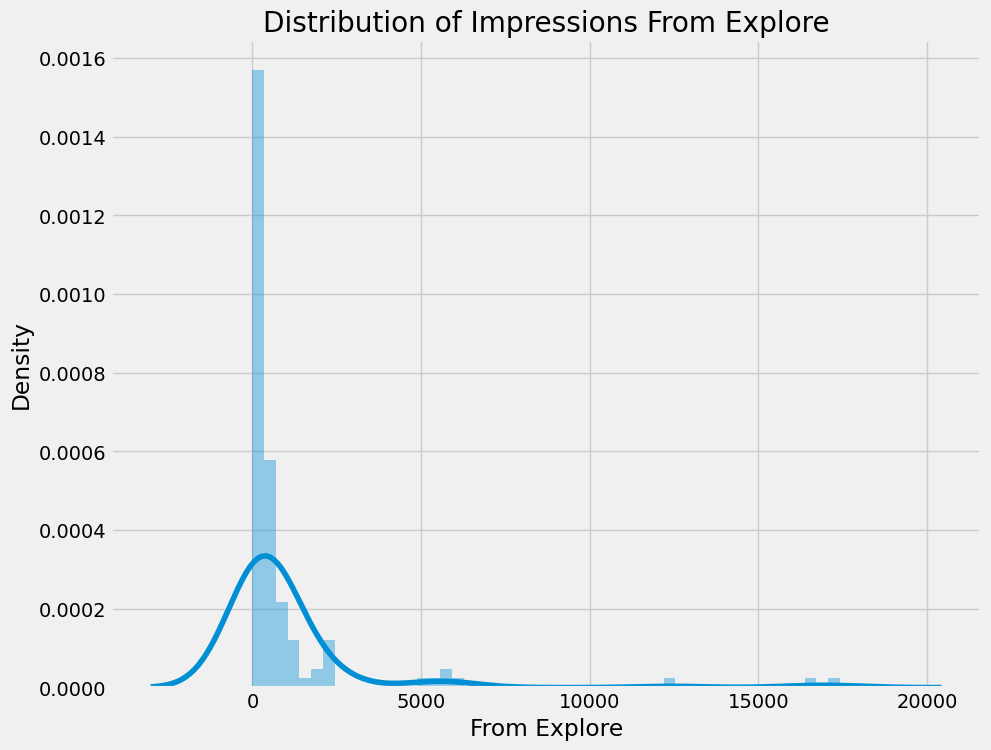

In [9]:
plt.figure(figsize=(10, 8))

plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()

In [10]:
# Creating Pie chart
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5)
fig.show()

## Analyzing Content
#### Creating WordCloud using Caption column text values only


In [13]:
data["Caption"]

0      Here are some of the most important data visua...
1      Here are some of the best data science project...
2      Learn how to train a machine learning model an...
3      Heres how you can write a Python program to d...
4      Plotting annotations while visualizing your da...
                             ...                        
114    Here are some of the best data science certifi...
115    Clustering is a machine learning technique use...
116    Clustering music genres is a task of grouping ...
117    Here are some of the best data science certifi...
118    175 Python Projects with Source Code solved an...
Name: Caption, Length: 119, dtype: object

In [16]:
# Using Caption column text values
text = " ".join(i for i in data.Caption)   
text
# removes all paragraphs and row indexes thus joining/combining each row sentence into 0ne long continuous sentence and enclosed by ""

"Here are some of the most important data visualizations that every Financial Data Analyst/Scientist should know. Here are some of the best data science project ideas on healthcare. If you want to become a data science professional in the healthcare domain then you must try to work on these projects. Learn how to train a machine learning model and giving inputs to your trained model to make predictions using Python. Here\x92s how you can write a Python program to detect whether a sentence is a question or not. The idea here is to find the words that we see in the beginning of a question in the beginning of a sentence. Plotting annotations while visualizing your data is considered good practice to make the graphs self-explanatory. Here is an example of how you can annotate a graph using Python. Here are some of the most important soft skills that every data scientist should have. Learn how to analyze a candlestick chart as a data scientist or a financial analyst. I hope this resource wi

In [ ]:
# displays all stopwords
stopwords = set(STOPWORDS)
stopwords

In [17]:
# Removing the stopwords in d text sentence
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud

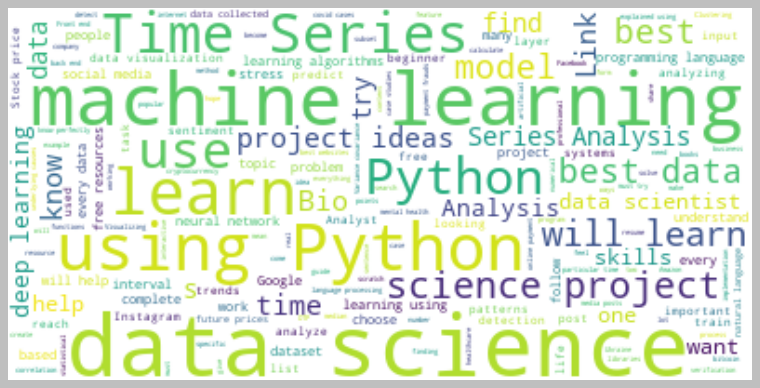

In [18]:
# Visualize d WordCloud
plt.style.use('classic')
plt.figure( figsize=(12,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
data["Hashtags"]

0      #finance #money #business #investing #investme...
1      #healthcare #health #covid #data #datascience ...
2      #data #datascience #dataanalysis #dataanalytic...
3      #python #pythonprogramming #pythonprojects #py...
4      #datavisualization #datascience #data #dataana...
                             ...                        
114    #datascience #datasciencejobs #datasciencetrai...
115    #machinelearning #machinelearningalgorithms #d...
116    #machinelearning #machinelearningalgorithms #d...
117    #datascience #datasciencejobs #datasciencetrai...
118    #python #pythonprogramming #pythonprojects #py...
Name: Hashtags, Length: 119, dtype: object

In [20]:
# # Using Caption column text values
text = " ".join(i for i in data.Hashtags)
text
# removes all paragraphs and row indexes thus joining/combining each row sentence into 0ne long continuous sentence and enclosed by ""

'#finance\xa0#money\xa0#business\xa0#investing\xa0#investment\xa0#trading\xa0#stockmarket\xa0#data\xa0#datascience\xa0#dataanalysis\xa0#dataanalytics\xa0#datascientist\xa0#machinelearning\xa0#python\xa0#pythonprogramming\xa0#pythonprojects\xa0#pythoncode\xa0#artificialintelligence\xa0#ai\xa0#dataanalyst\xa0#amankharwal\xa0#thecleverprogrammer #healthcare\xa0#health\xa0#covid\xa0#data\xa0#datascience\xa0#dataanalysis\xa0#dataanalytics\xa0#datascientist\xa0#machinelearning\xa0#python\xa0#pythonprogramming\xa0#pythonprojects\xa0#pythoncode\xa0#artificialintelligence\xa0#ai\xa0#dataanalyst\xa0#amankharwal\xa0#thecleverprogrammer #data\xa0#datascience\xa0#dataanalysis\xa0#dataanalytics\xa0#datascientist\xa0#machinelearning\xa0#python\xa0#pythonprogramming\xa0#pythonprojects\xa0#pythoncode\xa0#artificialintelligence\xa0#ai\xa0#deeplearning\xa0#machinelearningprojects\xa0#datascienceprojects\xa0#amankharwal\xa0#thecleverprogrammer\xa0#machinelearningmodels #python\xa0#pythonprogramming\xa0#py

In [21]:
stopwords = set(STOPWORDS)

In [22]:
# Removing the stopwords in d text sentence
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

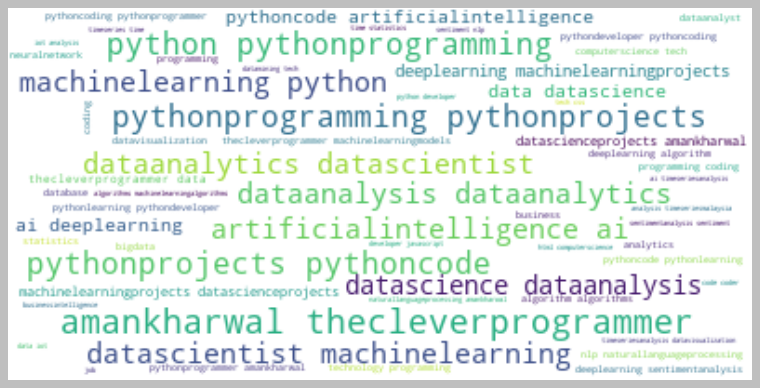

In [23]:
# Visualize d WordCloud
plt.figure( figsize=(12,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Analyzing Relationships between columns using Interactive Scatterplots

In [24]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()
# We can see a +ve relationship/correlation btw both columns

In [25]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [26]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [27]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions")
figure.show()

#### Correlation Analysis

In [37]:
correlation = data.iloc[:, :-2]  # all rows, all columns except last 2 columns (the last 2 columns are not numerical)

In [38]:
mycorrelation = correlation.corr()
print(mycorrelation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


## Analyzing Conversion Rate
* Conversion rate is the rate at which people that visit your profile (Profile Visits) become your page followers (Followers gained)

In [29]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [30]:
# Visualize d relationship btw both columns
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

## Instagram Reach Prediction Model

In [39]:
# Define response and predictor
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])

y = np.array(data["Impressions"])

In [40]:
# Data Split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [41]:
model = PassiveAggressiveRegressor()

model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8046131306389099

Predicting Impressions value on new data

In [42]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([9424.33512243])